# 02 - Train

In this notebook, we train the model and push it to Hopsworks.

In [13]:
import hopsworks
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd


In [14]:
project = hopsworks.login(project="id2223_pierrelf_emilk2")
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/186517
Connected. Call `.close()` to terminate connection gracefully.


In [15]:
fg = fs.get_feature_group(name="winequality", version=1)
query = fg.select_all()
feature_view = fs.get_or_create_feature_view(name="winequality",
                                  version=1,
                                  description="Read from winequality dataset",
                                  labels=["quality"],
                                  query=query)

In [16]:
# You can read training data, randomly split into train/test sets of features (X) and labels (y)        
X_train, X_test, y_train, y_test = feature_view.train_test_split(0.2)

# Train our model with the Scikit-learn K-nearest-neighbors algorithm using our features (X_train) and labels (y_train)
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train.values.ravel())

Finished: Reading data from Hopsworks, using ArrowFlight (1.31s) 


KNeighborsClassifier(n_neighbors=10)

In [17]:
# Evaluate model performance using the features from the test set (X_test)
y_pred = model.predict(X_test)

# Compare predictions (y_pred) with the labels in the test set (y_test)
metrics = classification_report(y_test, y_pred, output_dict=True)
results = confusion_matrix(y_test, y_pred)


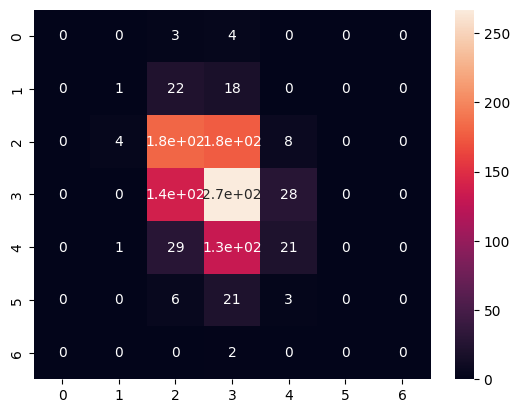

In [18]:
# Create the confusion matrix as a figure, we will later store it as a PNG image file
df_cm = pd.DataFrame(results)
cm = sns.heatmap(df_cm, annot=True)
fig = cm.get_figure()

In [19]:
metrics

{'3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 7.0},
 '4': {'precision': 0.16666666666666666,
  'recall': 0.024390243902439025,
  'f1-score': 0.0425531914893617,
  'support': 41.0},
 '5': {'precision': 0.47757255936675463,
  'recall': 0.4905149051490515,
  'f1-score': 0.4839572192513369,
  'support': 369.0},
 '6': {'precision': 0.43134087237479807,
  'recall': 0.6166281755196305,
  'f1-score': 0.5076045627376425,
  'support': 433.0},
 '7': {'precision': 0.35,
  'recall': 0.11538461538461539,
  'f1-score': 0.17355371900826447,
  'support': 182.0},
 '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 30.0},
 '9': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2.0},
 'accuracy': 0.4417293233082707,
 'macro avg': {'precision': 0.20365429977260277,
  'recall': 0.17813113427939092,
  'f1-score': 0.17252409892665796,
  'support': 1064.0},
 'weighted avg': {'precision': 0.4074513209379261,
  'recall': 0.4417293233082707,
  'f1-score': 0.405737

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/186517
Connected. Call `.close()` to terminate connection gracefully.
Finished: Reading data from Hopsworks, using ArrowFlight (1.26s) 
KNN_2: 0.4050751879699248


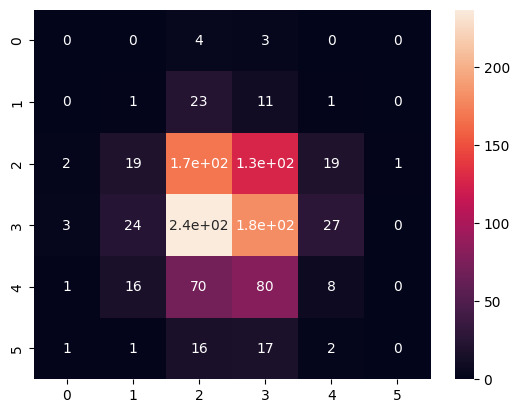

In [4]:
import hopsworks
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib as plt
import pandas as pd
import seaborn as sns

project = hopsworks.login(project="id2223_pierrelf_emilk2")
fs = project.get_feature_store()

fg = fs.get_feature_group(name="winequality", version=1)
query = fg.select_all()
feature_view = fs.get_or_create_feature_view(name="winequality",
                                             version=1,
                                             description="Read from winequality dataset",
                                             labels=["quality"],
                                             query=query)


# You can read training data, randomly split into train/test sets of features (X) and labels (y)
X_train, X_validation, X_test, y_train, y_validation, y_test = feature_view.train_validation_test_split(
    0.2, 0.2)

# Create a list of models to evaluate
models = []

for i in range(2, 3):
    models.append((f'KNN_{i}', KNeighborsClassifier(n_neighbors=i)))

# evaluate each model in turn
results = []

# try dropping columns
for (name, model) in models:
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_validation)

    results.append(y_pred)

    print(f"{name}: {model.score(X_validation, y_validation)}")

for result in results:
    metrics = classification_report(y_test, result, output_dict=True)
    matrix = confusion_matrix(y_test, result)

    df_cm = pd.DataFrame(matrix)
    cm = sns.heatmap(df_cm, annot=True)
    fig = cm.get_figure()